# Data Visualization Lab - Sebastiano Cassol - id: 229318
> 11 - 01 - 2021

## Exercise 1
(...)

## Exercise 2
(...)

## Exercise 3
(...)

## Exercise 4
Choropleth map of US states using `states_geo.tsv` and `states_vote.tsv`.

In [ ]:
# imports
import pandas as pd

In [ ]:
geo = pd.read_csv("../states_geo.tsv")
votes = pd.read_csv("../states_vote.tsv")

In [ ]:
geo

In [ ]:
votes

In [ ]:
states_from_geo = geo['state'].unique().tolist()
states_from_vote = votes['state'].unique().tolist()

In [ ]:
# how many states are in common between the two data frames?
common_states = set(states_from_vote) & set(states_from_geo)

print("Common states len:", len(common_states))
print("States from geo len:", len(states_from_geo))
print("States from vote len:", len(states_from_vote))

In [ ]:
# We need to remove some states from vote, but what?
states_to_delete = set(states_from_vote) - common_states

states_to_delete

In [ ]:
# Let's remove this rows.
index = votes[votes['state'] == 'Maine 1st District'].index[0]

index # this is our index
# we need to do this for all states to remove

In [ ]:
# remove exceeding states
for states in states_to_delete:
    ind = votes[votes['state'] == states].index[0]
    votes = votes.drop(ind)
    
print("New length of votes data frame is", len(votes))

In [ ]:
votes.reset_index(inplace=True)
votes.pop('index') # remove (old) index from votes

In [ ]:
votes

We need to merge the data frames. We can use a homemade trick iterating with a for, or we can use the `merge` pandas function. We'll try the second.

In [ ]:
merged_df = pd.merge(geo, votes, left_on="state", right_on="state")

merged_df

And now we can start with the choropleth map.

In [ ]:
#imports
import json
import plotly.express as px

In [ ]:
with open('../../../geojson/us-state-boundaries.geojson') as data:
    us_json = json.load(data)
    
us_json

In [ ]:
# let's see how the names of the states appear in the geo json file
names_in_json = []
for i in range(len(us_json['features'])):
    names_in_json.append(us_json['features'][i]['properties']['name'])

names_in_json

In [ ]:
# choropleth map
fig = px.choropleth_mapbox(merged_df,
                           geojson=us_json,
                           locations='state',
                           featureidkey='properties.name',
                           color='called',
                           color_continuous_scale='Viridis',
                           range_color=(0.01, 2),
                           labels={'Poverty':'poverty', 'Party':'called'},
                           title='Poverty & Political Party',
                           hover_data=['poverty', 'called'],
                           center={'lon': -70, 'lat': 40},
                           mapbox_style='open-street-map',
                           zoom=2)

fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

## Exercise 5
Apply t-SNE and MDS to `Leukemia.csv`.

In [ ]:
import pandas as pd
import time
from sklearn.manifold import TSNE

In [ ]:
data = pd.read_csv('../Leukemia.csv')

data

In [ ]:
# apply tsne
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data.iloc[:, :-1]) # remove last column (label)
print("t-SNE done! Time elapsed: {} sec".format(time.time()-time_start))



In [ ]:
tsne_results

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualize t-sne results
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="Class",
    palette=sns.color_palette("hls", 4),
    data=data,
    legend="full",
    alpha=1
)
plt.title('t-SNE applied to Leukemia dataset')
plt.show()

In [ ]:
from sklearn.manifold import MDS
# apply mds

data = pd.read_csv('../Leukemia.csv')

In [ ]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(data.iloc[:,:-1])

In [ ]:
data['mds-2d-one'] = X_transformed[:,0]
data['mds-2d-two'] = X_transformed[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="mds-2d-one",
    y="mds-2d-two",
    hue="Class",
    palette=sns.color_palette("hls", 4),
    data=data,
    legend="full",
    alpha=1
)

plt.title('t-SNE applied to Leukemia dataset')
plt.show()

## Exercise 6
Replicate that plot! With `iris.csv`.

In [27]:
iris = pd.read_csv('../iris.csv')

iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
iris.loc[0]

sepal length            5.1
sepal width             3.5
petal length            1.4
petal width             0.2
class           Iris-setosa
Name: 0, dtype: object

In [44]:
labels = iris['class'].unique().tolist()

labels

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [32]:
len(iris)

150

In [33]:
markers = []
for i in range(len(iris)):
    if iris.loc[i]['class'] == labels[0]:
        markers.append('.')
    elif iris.loc[i]['class'] == labels[1]:
        markers.append('d')
    elif iris.loc[i]['class'] == labels[2]:
        markers.append('4')
        
markers

['.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4']

In [34]:
colors = ['#007ad6', 'orange', 'green']

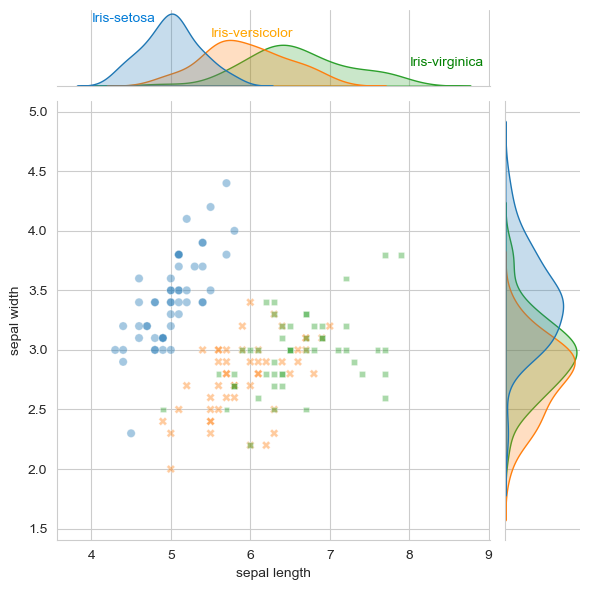

In [55]:
import seaborn as sns

sns.set_style('whitegrid')
fig = sns.jointplot(
    data=iris,
    x='sepal length',
    y='sepal width',
    hue="class",
    style=markers,
    legend=False,
    alpha=.4
)

fig.ax_marg_x.text(4, 0.33, labels[0], color=colors[0])
fig.ax_marg_x.text(5.5, 0.25, labels[1], color=colors[1])
fig.ax_marg_x.text(8, 0.1, labels[2], color=colors[2])

plt.show()